In [4]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [5]:
df = pd.read_csv('csvFiles/stock price.csv')

In [6]:
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2019,12,2.75,5.3,1464
1,2019,11,2.50,5.3,1394
2,2019,10,2.50,5.3,1357
3,2019,9,2.50,5.3,1293
4,2019,8,2.50,5.4,1256
5,2019,7,2.50,5.6,1254
6,2019,6,2.50,5.5,1234
7,2019,5,2.25,5.5,1195
8,2019,4,2.25,5.5,1159
9,2019,3,2.25,5.6,1167


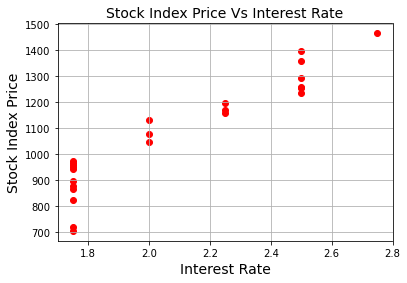

In [7]:
#check for linearity
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

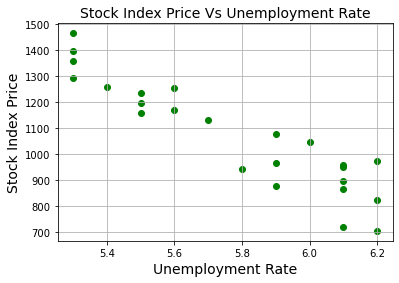

In [8]:
#check for linearity
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [9]:
X = df[['Interest_Rate','Unemployment_Rate']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price'].astype(float) # output variable (what we are trying to predict)

In [10]:
# linear regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 1792.1454319453078
Coefficients: 
 [ 345.43443132 -248.95276569]


In [11]:
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Interest_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Stock_Index_Price']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Unemployment_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Stock_Index_Price']) 
ax4.set_xlabel('Unemployment_Rate')
ax4.set_title('Unemployment_Rate Vs. Stock Index Price')

root.mainloop()